Before starting this example
----------------------------

You need to download the necessary data:
 1. First, register on [BRATS: The Visible Skeleton Database](https://www.smir.ch/BRATS/Start2012).
 2. Then download the archive under **BRATS 2 Training data**

How did you start Notebook
--------------------------

When starting this notebook using this:
```bash
~/tutorial-env/bin/ipython notebook --pylab=inline
```
comment out the code in the following cell.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np # Numpy for general purpose processing
import SimpleITK as sitk # SimpleITK to load images
import sys

sys.path.append('../../')
from pyLAR.alm.ialm import recover # Candes et al.’s RPCA approach

In [3]:
with open('./FLAIR_FILES.txt') as fid:
    im_names = fid.read().splitlines()
with open('./GT_FILES.txt') as fid:
    gt_names = fid.read().splitlines()

**Did you download the data?** If not, do it now.

**Update** the value of `data_folder` in the next cell to point to where your data was downloaded and extracted.

In [4]:
data_folder = '/home/fbudin/Data/BRATS_from_Virtual_Skeleton_Databa_project/BRATS_Training/BRATS-2/Synthetic_Data/HG'

In [5]:
assert (len(im_names) > 0)
assert (len(gt_names) == len(im_names))
# load first image
slice_nr = 100


tmp = sitk.ReadImage(data_folder+'/'+im_names[0]) # image in SITK format
tmp = sitk.GetArrayFromImage(tmp) # get numpy array
z_dim, x_dim, y_dim = tmp.shape # get 3D volume shape
print tmp.shape
tmp = tmp[slice_nr,:,:] # extract our slice
tmp = tmp.reshape(-1) # vectorize

(181, 256, 256)


In [99]:
T1 = np.zeros((len(tmp), len(im_names)))
print T1.shape
for i, im_file in enumerate(im_names):
    tmp = sitk.ReadImage(data_folder+'/'+im_file)
    tmp = sitk.GetArrayFromImage(tmp)
    tmp = tmp[slice_nr,:,:]
    T1[:,i] = tmp.reshape(-1)
# read the ground truth


GT = np.zeros(T1.shape)
for i, gt_file in enumerate(gt_names):
    tmp = sitk.ReadImage(data_folder+'/'+gt_file) # image in SITK format
    tmp = sitk.GetArrayFromImage(tmp) # get numpy array
    tmp = tmp[slice_nr,:,:] # extract our slice
    GT[:,i] = tmp.reshape(-1) # vectorize

(65536, 25)


(256, 256)


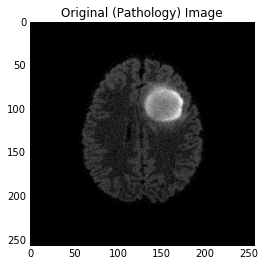

In [100]:
im=T1[:,0].reshape((x_dim,y_dim))
print im.shape
imshow(im, plt.cm.gray)
plt.title('Original (Pathology) Image')


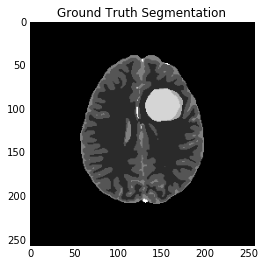

In [101]:
imshow(GT[:,0].reshape((x_dim,y_dim)), cm.gray)
plt.title('Ground Truth Segmentation')


In [102]:
selection = [0,1,2,3,4,5,6,7,8,9]
num_of_data=len(selection)



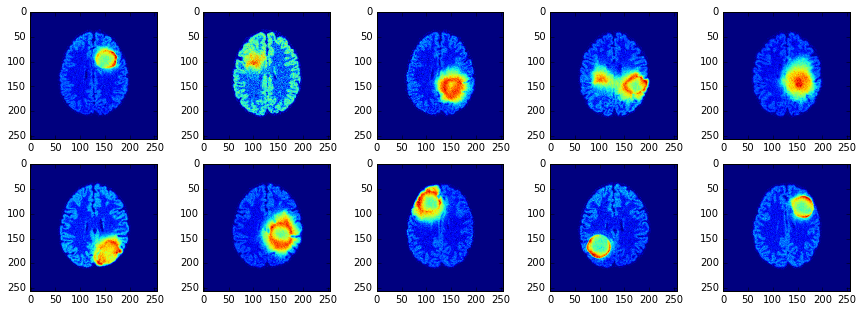

In [107]:
Y = T1[:,selection]
fig = plt.figure(figsize=(15,5))
for i in range(num_of_data):
    fig.add_subplot(np.ceil(num_of_data/5.0),5,i+1)
    imshow(T1[:,selection[i]].reshape((x_dim,y_dim)))
    implot.set_clim(0,2800)

In [108]:
gamma = 0.5* sqrt(float(Y.shape[1])/Y.shape[0])
print gamma

low_rank, sparse, n_iter,rank_est, non_zero, abs_sum_sparse = recover(Y,gamma)


0.00617632355502
[iter: 0000]: rank(P) = 0001, |C|_0 = 29845, crit=0.3562086225, total sparse =39531753
[iter: 0010]: rank(P) = 0002, |C|_0 = 182091, crit=0.0017561045, total sparse =76822300
[iter: 0020]: rank(P) = 0002, |C|_0 = 191129, crit=0.0000231953, total sparse =76901362
[iter: 0030]: rank(P) = 0002, |C|_0 = 194944, crit=0.0000003603, total sparse =76901198


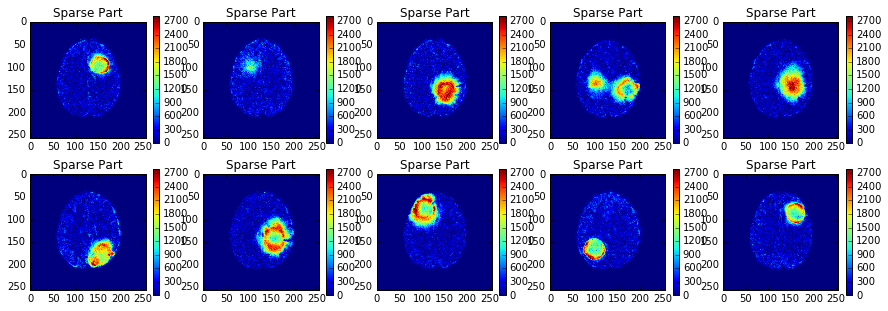

In [110]:

fig = plt.figure(figsize=(15,5))
for i in range(num_of_data):
    fig.add_subplot(np.ceil(num_of_data/5.0),5,i+1)
    implot = imshow(np.abs(sparse[:,i].reshape((256,256))))
    plt.title('Sparse Part')
    plt.colorbar()
    implot.set_clim(0,2800)

(65536, 10)
(65536, 10)


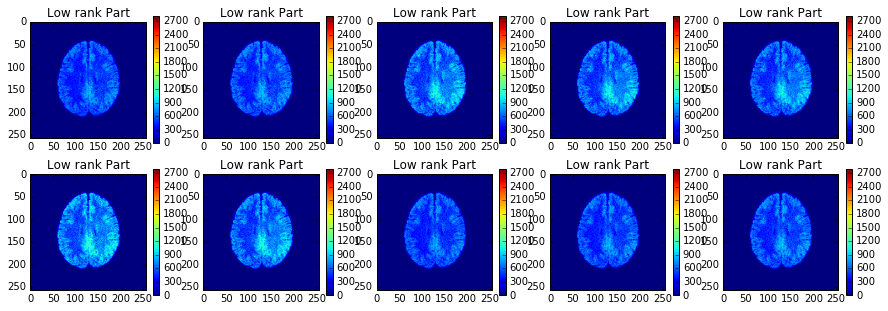

In [111]:
print low_rank.shape
print sparse.shape
fig = plt.figure(figsize=(15,5))
for i in range(num_of_data):
    fig.add_subplot(np.ceil(num_of_data/5.0),5,i+1)
    implot =imshow(np.abs(low_rank[:,i].reshape((256,256))))
    plt.title('Low rank Part')
    plt.colorbar()
    implot.set_clim(0,2800)